# Applying TFIDF Vectors and t-SNE to Subreddit Content
While researching for this project, I discovered a whole lot of subreddit mappings and visualaztions out there. Most of them employ user engagement as a metric for modularity detection. (Insert Sources). Since this project is based on breaking free of traditional user interest-patterns, I decided to quantify subreddit differences by content alone, in much the same way as Andrej Kaparthy does in [this blog post](http://karpathy.github.io/2014/07/02/visualizing-top-tweeps-with-t-sne-in-Javascript/).

## Collecting Data
Using the previously mentioned post as a rough guide, I started implementing the community difference analysis. Initial analysis, I simply downloaded comment text from a large handful of default subreddits, with the code saved in /download.py. Basically I just save a file for each sub with concatenated raw comment text, and a list of the files (for scikit to use later on).

In [19]:
import pickle
files_store = open('data/sub_files.pickle','rb')
files_list = pickle.load(files_store)
print(files_list)

['data/subs/gadgets.txt', 'data/subs/sports.txt', 'data/subs/gaming.txt', 'data/subs/pics.txt', 'data/subs/worldnews.txt', 'data/subs/videos.txt', 'data/subs/AskReddit.txt', 'data/subs/aww.txt', 'data/subs/funny.txt', 'data/subs/news.txt', 'data/subs/movies.txt', 'data/subs/blog.txt', 'data/subs/books.txt', 'data/subs/history.txt', 'data/subs/food.txt', 'data/subs/philosophy.txt', 'data/subs/Jokes.txt', 'data/subs/Art.txt', 'data/subs/DIY.txt', 'data/subs/space.txt', 'data/subs/Documentaries.txt', 'data/subs/askscience.txt', 'data/subs/nottheonion.txt', 'data/subs/todayilearned.txt', 'data/subs/personalfinance.txt', 'data/subs/gifs.txt', 'data/subs/listentothis.txt', 'data/subs/IAmA.txt', 'data/subs/announcements.txt', 'data/subs/TwoXChromosomes.txt', 'data/subs/creepy.txt', 'data/subs/nosleep.txt', 'data/subs/GetMotivated.txt', 'data/subs/WritingPrompts.txt', 'data/subs/LifeProTips.txt', 'data/subs/EarthPorn.txt', 'data/subs/explainlikeimfive.txt', 'data/subs/Showerthoughts.txt', 'dat

## Vectorization
Next I used the TfidfVectorizer from scikit to process and vectorize the content based on text features. These vectors are dimensioned according to the number of ngrams.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(input='filename',stop_words='english',lowercase=True, strip_accents='unicode', smooth_idf=True,sublinear_tf=False, use_idf=True, ngram_range=(1,2),min_df=2)
vecs = vectorizer.fit_transform(files_list)

This gives a 47 X 35155 matrix where each row is a subreddit TFIDF matrix with horizontal dimension corresponding to the ngram features.

In [21]:
vecs

<47x33304 sparse matrix of type '<class 'numpy.float64'>'
	with 166749 stored elements in Compressed Sparse Row format>

## Dimensionality Reduction
The next step is to apply t-SNE implementations and see how they work on the data. I used scikit's built-implementation for this task. For t-SNE the the dot product dissimilarities are required as input.

In [22]:
dists = (vecs * vecs.T).todense()

In [23]:
from sklearn.manifold import TSNE
vecs_2d = TSNE(n_components=2).fit_transform(dists)
vecs_2d

array([[ -70.76349  ,  -68.1448   ],
       [  24.710043 ,  -95.065544 ],
       [  67.79516  ,  -18.268291 ],
       [ -47.880367 ,   38.932613 ],
       [  16.997202 ,   65.94366  ],
       [ -79.57723  ,  -34.992004 ],
       [  22.805357 ,   98.49244  ],
       [  21.333881 ,  -18.28792  ],
       [  34.771442 ,   35.413204 ],
       [  97.79474  ,   45.059326 ],
       [  46.233654 ,   -0.9038696],
       [ -89.384285 ,   32.28779  ],
       [  -6.2306933,   84.74865  ],
       [ -22.725344 ,  -96.33073  ],
       [  19.213978 ,  -49.900166 ],
       [ -15.77874  ,   20.299814 ],
       [  53.54111  ,  -66.65048  ],
       [-106.697044 ,  -69.99791  ],
       [ -92.90821  , -101.752525 ],
       [  84.25711  ,  -50.269287 ],
       [ -45.90925  ,    6.454223 ],
       [ -64.839745 , -102.53904  ],
       [ -18.182608 ,   57.158638 ],
       [  68.28976  ,   50.07442  ],
       [  84.46269  ,    9.409664 ],
       [ -70.103676 ,   -4.7887926],
       [-121.7057   , -100.509026 ],
 

Now I have (hopefully meaningful) 2-dimensional vector representations of all the subreddits!

## Visualizations
To get a rough idea of that the reduced vectors look like, I produced a simple plot. Note that each execution of t-SNE results in different embeddings, while variance is preserved. Subreddit pairs like r/worldnews and r/news are always close, which is promising. Also note that the colours used for plotting have no meaning and simply look cool.

<IPython.core.display.Javascript object>


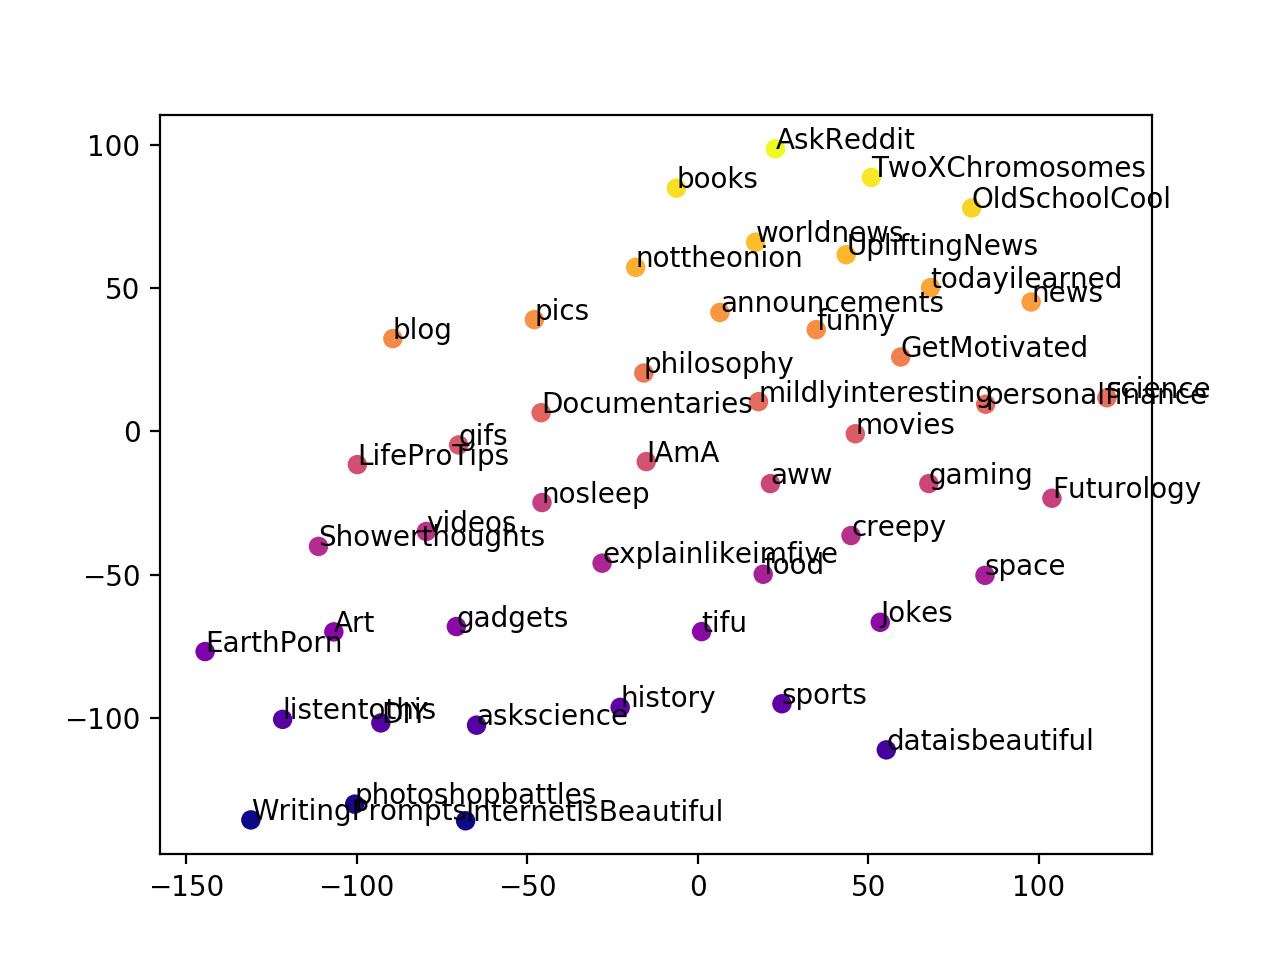

In [24]:
%matplotlib notebook
import matplotlib.pyplot as plt
x = vecs_2d[:,0]
y = vecs_2d[:,1]
plt.scatter(x,y,c=y,cmap='plasma')

# annotate the plot
names_store = open('data/sub_names.pickle','rb')
names = pickle.load(names_store)
for i, name in enumerate(names):
    plt.annotate(name,(x[i],y[i]))
    
plt.show()

My next steps will be to download a larger dataset and apply clustering/modularity analysis to visualize in more depth.

## A Slightly Larger Dataset
To get a more interesting set of subreddits, I downloaded a csv file containing info for all public subreddits (as of the posting of [this reddit post](https://www.reddit.com/r/datasets/comments/8isnek/list_of_every_subreddit_on_reddit/). I downloaded info for the first 100 and performed the same analysis procedure as before. (See /download_large.py)

<IPython.core.display.Javascript object>


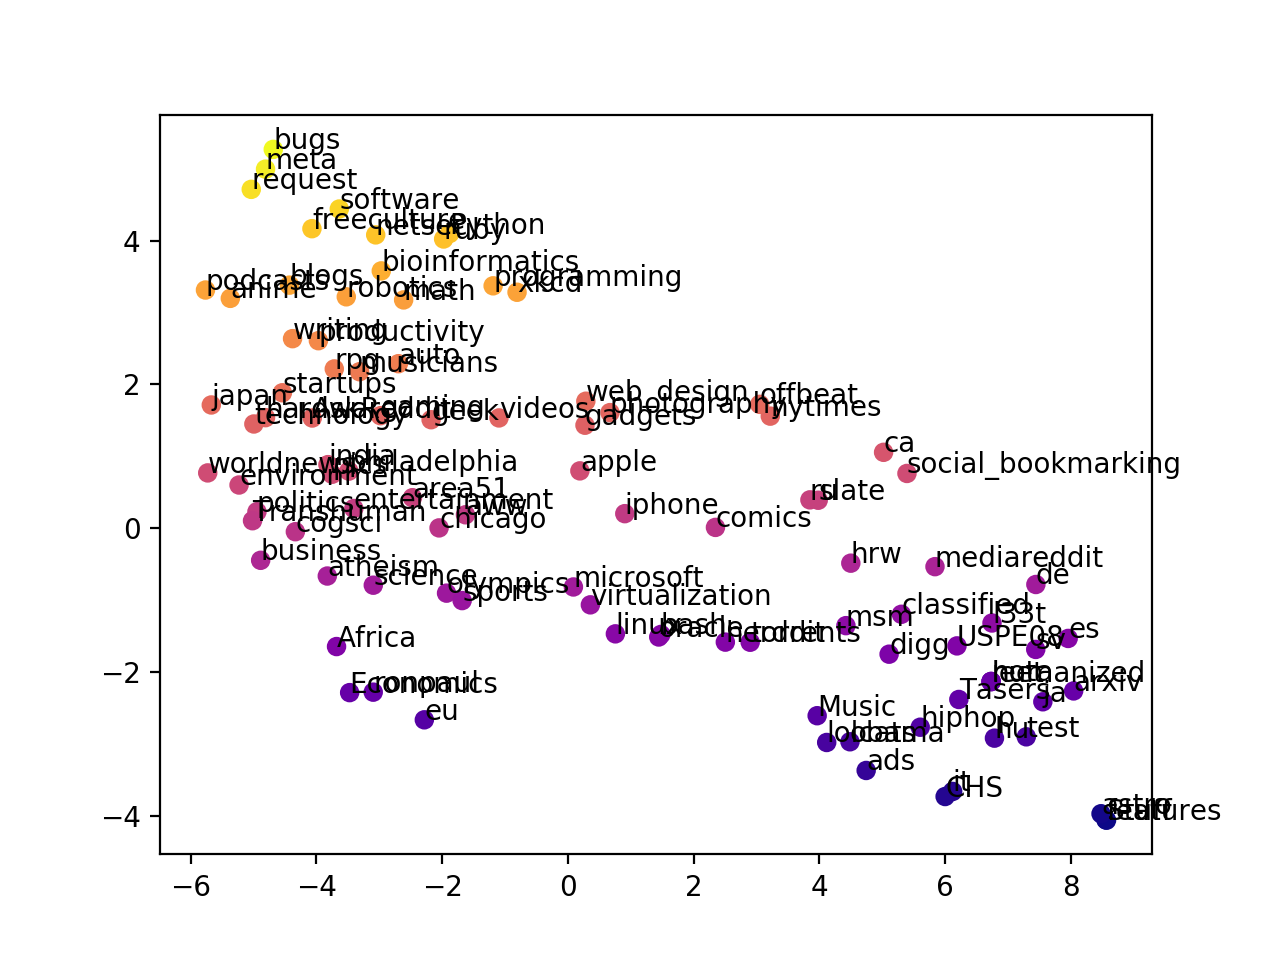

In [25]:
def apply(files_list_dir):
    files_store = open(files_list_dir,'rb')
    files_list = pickle.load(files_store)
    vectorizer = TfidfVectorizer(input='filename',stop_words='english',lowercase=True, strip_accents='unicode', smooth_idf=True,sublinear_tf=False, use_idf=True, ngram_range=(1,2),min_df=2)
    vecs = vectorizer.fit_transform(files_list)
    dists = (vecs * vecs.T).todense()
    vecs_2d = TSNE(n_components=2).fit_transform(dists)
    return vecs_2d

points = apply('data/sub_files_large.pickle')

plt.figure()
x = points[:,0]
y = points[:,1]
plt.scatter(x,y,c=y,cmap='plasma')
names_store = open('data/sub_names_large.pickle','rb')
names = pickle.load(names_store)
for i, name in enumerate(names):
    plt.annotate(name,(x[i],y[i]))
plt.show()

The annotations in this plot are a little jumbled, but it's possible to see the work of the algorithm with subreddits like programming, linux, and ruby closely surrounding r/software. The figure also shows some interesting interesting features (deviations from the pattern that one mught expect) which could shed light on discrepencies between subreddit names and the actual content of discussion happening in the comments.

### Even More Subreddits
Next I modified the download code to sort subreddits by subsciber count so that I could choose a variable-sized selection of top subs. (This code is in /download_all.py). Here is the algorithm run on 1000 subreddits (again, the colour is just for fun)

<IPython.core.display.Javascript object>


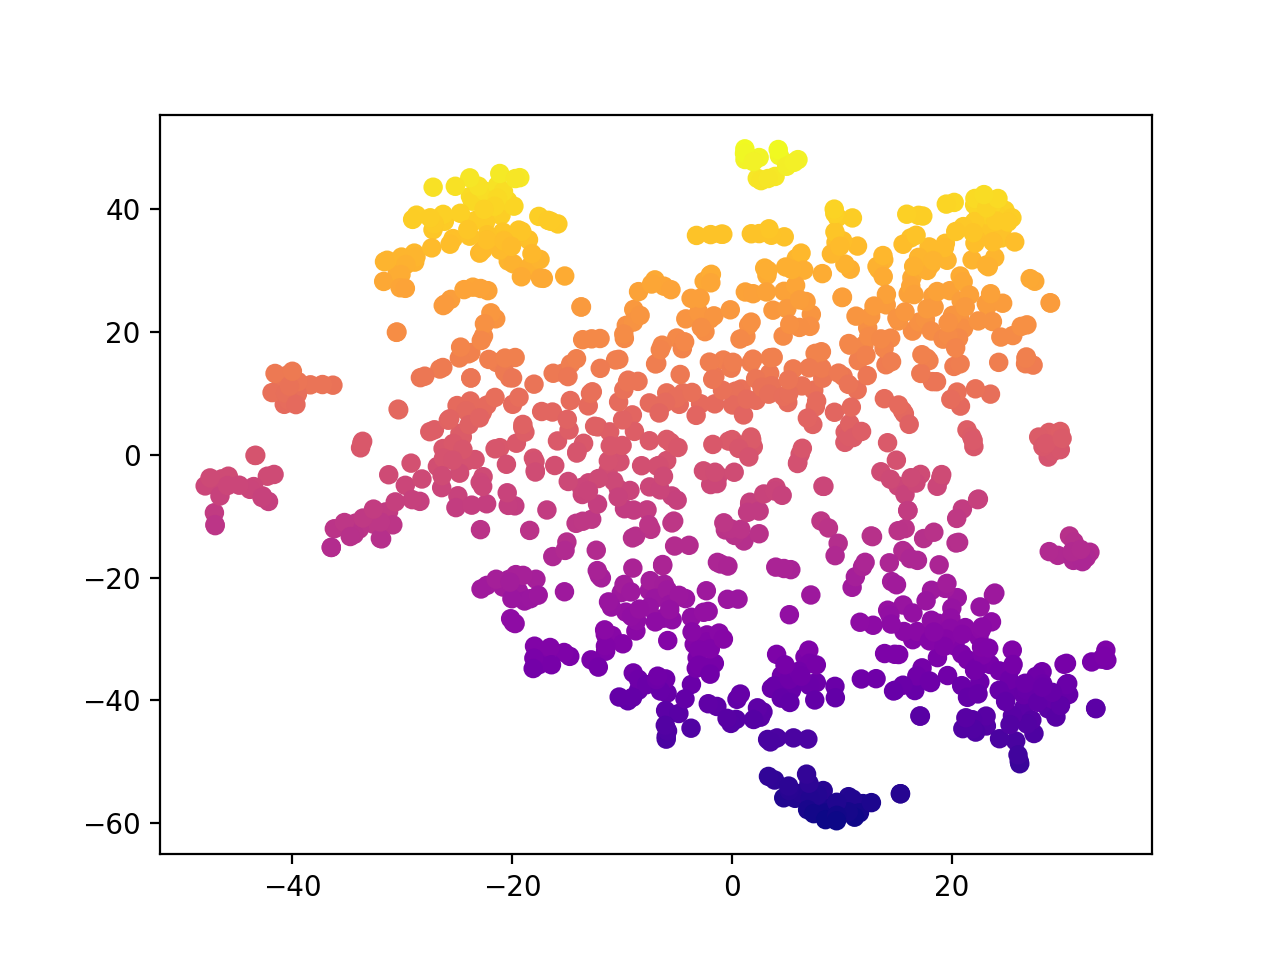

In [26]:
points = apply('data/sub_files_all.pickle')
plt.figure()
x = points[:,0]
y = points[:,1]
plt.scatter(x,y,c=y,cmap='plasma')
plt.show()

Some interesting clusters start to appear with this number of data-points. Later on, I will apply some sort of clustering algorithm - and find a way to display subreddit names without crowding them on a plot.

Saving the data for later use:

In [28]:
import pandas as pd
names_store = open('data/sub_names_all.pickle','rb')
names = pickle.load(names_store)
data = {'name':names, 'x':x, 'y':y}
df = pd.DataFrame(data,columns=['name','x','y'])
df.to_csv('data/vecs.csv', sep=',', encoding='utf-8')